In [1]:
random_seed = 1
import random
random.seed(random_seed)

import numpy as np
# set the random seed to make the experiment reproducible

np.random.seed(random_seed)

import tensorflow
# set seed
tensorflow.random.set_seed(random_seed)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from keras.utils import np_utils

In [3]:
X_train = pd.read_excel('data/model_inputs/x_train.xlsx', index_col=0)
X_test = pd.read_excel('data/model_inputs/x_test.xlsx', index_col=0)
y_train = pd.read_excel('data/model_inputs/y_train.xlsx', index_col=0)
y_test = pd.read_excel('data/model_inputs/y_test.xlsx', index_col=0)

In [4]:
pd.DataFrame(y_train.reset_index()).groupby('decision').count()

,index
decision,
-1,30
0,1436
1,45


In [5]:
1436 / (1436 + 30 + 45)

0.9503639973527466

In [6]:
# shuffle the dataset! 
train_data = X_train.copy(deep=True)
train_data['decision'] = y_train['decision']

train_data = train_data.sample(frac=1)

X_train = train_data.drop(['decision'], axis=1)
y_train = pd.DataFrame(train_data['decision'])

In [7]:
# convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train['decision'])
y_test = np.array(y_test['decision'])

In [8]:
# one hot encode
y_train = np_utils.to_categorical(y_train, num_classes=3)

In [9]:
def plot_curve(hist):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  epochs = hist.epoch
  f, ax = plt.subplots(ncols=2, figsize=(20,8))
  ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
  ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()
  ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
  ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

In [10]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(input_shape=(X_train.shape[1],), units=32, activation='relu')) ### remove flatten code
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))    ### change to 2 ?? aft one hot encode, 1 feature dropped?
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="categorical_crossentropy", ### change to non sparse
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
  return history   

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
hist = train_model(my_model, X_train, y_train, epochs, batch_size, validation_split)

Epoch 1/50
1/1 [==============================] - 1s 516ms/step - loss: 144180.6562 - accuracy: 0.7508 - val_loss: 55032.0625 - val_accuracy: 0.9604
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 132889.3281 - accuracy: 0.7980 - val_loss: 60362.3047 - val_accuracy: 0.9604
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 111173.6406 - accuracy: 0.8402 - val_loss: 65039.6172 - val_accuracy: 0.9604
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 111254.3438 - accuracy: 0.8800 - val_loss: 68645.9766 - val_accuracy: 0.9604
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 87116.7734 - accuracy: 0.9056 - val_loss: 71206.0625 - val_accuracy: 0.9604
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 102072.8594 - accuracy: 0.8982 - val_loss: 72966.8828 - val_accuracy: 0.9604
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 100841.7344 - accuracy: 0.9189 - val_loss

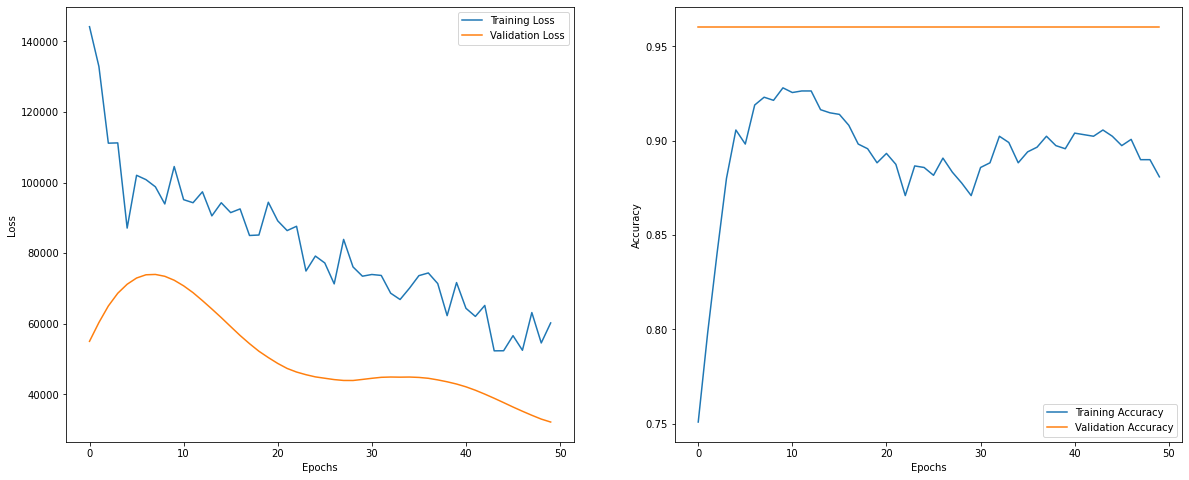

In [12]:
# Plot a graph of the metric vs. epochs.
plot_curve(hist)

In [13]:
pd.DataFrame(my_model.predict(X_train)).sum()

0    1511.0
1       0.0
2       0.0
dtype: float32